Dataset link: https://www.kaggle.com/datasets/thomasdubail/brain-tumors-256x256

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

### Images of each category

In [2]:
print("Glioma Tumor:", len(os.listdir('/kaggle/input/brain-tumors-256x256/Data/glioma_tumor')))
print("Meningioma Tumor:", len(os.listdir('/kaggle/input/brain-tumors-256x256/Data/meningioma_tumor')))
print("Normal:", len(os.listdir('/kaggle/input/brain-tumors-256x256/Data/normal')))
print("Pituitary Tumor:", len(os.listdir('/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor')))

Glioma Tumor: 901
Meningioma Tumor: 913
Normal: 438
Pituitary Tumor: 844


### Loading all the images

In [6]:
X, y= [], []
for file in os.listdir('/kaggle/input/brain-tumors-256x256/Data'):
    for image in os.listdir('/kaggle/input/brain-tumors-256x256/Data/'+str(file)):
        img = cv2.imread('/kaggle/input/brain-tumors-256x256/Data/'+str(file)+str('/')+str(image))
        X.append(img)
        y.append(file)

### Converting list to array

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
X.shape

(3096, 256, 256, 3)

In [13]:
y.shape

(3096,)

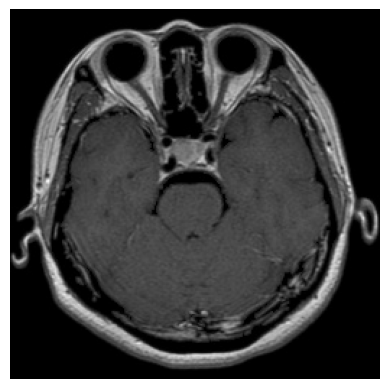

In [14]:
plt.axis("off")
plt.imshow(X[52])

### Normalization

In [18]:
X_scaled = X/255

In [20]:
X_scaled[0][158][25]

array([0.5254902, 0.5254902, 0.5254902])

### Performing one-hot encoding in y

In [22]:
from sklearn.preprocessing import LabelEncoder

In [31]:
ohe = LabelEncoder()

y_ohe = ohe.fit_transform(y)

In [32]:
pd.DataFrame(y_ohe).value_counts()

1    913
0    901
3    844
2    438
Name: count, dtype: int64

In [33]:
pd.DataFrame(y).value_counts()

meningioma_tumor    913
glioma_tumor        901
pituitary_tumor     844
normal              438
Name: count, dtype: int64

glioma_tumor is mapped to 0;
meningioma_tumor is mapped to 1;
normal is mapped to 2;
pituitary_tumor is mapped to 3

In [34]:
y_ohe

array([3, 3, 3, ..., 2, 2, 2])

In [35]:
y_cat = keras.utils.to_categorical(y_ohe, num_classes=4)
y_cat

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

### Splitting data into training and testing set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=21)

In [41]:
X_test.shape

(620, 256, 256, 3)

In [42]:
y_test.shape

(620, 4)

### Creating our model

In [45]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

### Training our model

In [46]:
model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
62/62 [==============================] - 20s 113ms/step - loss: 1.2728 - accuracy: 0.4010 - val_loss: 1.1490 - val_accuracy: 0.4819
Epoch 2/50
62/62 [==============================] - 4s 67ms/step - loss: 0.9484 - accuracy: 0.6152 - val_loss: 0.9210 - val_accuracy: 0.6028
Epoch 3/50
62/62 [==============================] - 4s 67ms/step - loss: 0.7272 - accuracy: 0.7212 - val_loss: 0.7492 - val_accuracy: 0.7056
Epoch 4/50
62/62 [==============================] - 4s 68ms/step - loss: 0.5576 - accuracy: 0.7970 - val_loss: 0.6035 - val_accuracy: 0.7742
Epoch 5/50
62/62 [==============================] - 4s 68ms/step - loss: 0.3705 - accuracy: 0.8621 - val_loss: 0.5827 - val_accuracy: 0.8024
Epoch 6/50
62/62 [==============================] - 4s 68ms/step - loss: 0.2777 - accuracy: 0.8944 - val_loss: 0.6394 - val_accuracy: 0.8024
Epoch 7/50
62/62 [==============================] - 4s 68ms/step - loss: 0.1519 - accuracy: 0.9434 - val_loss: 0.6358 - val_accuracy: 0.8004
Epoch 8/50


### Prediction for X_test

In [47]:
y_pred = model.predict(X_test)

20/20 [==============================] - 1s 38ms/step


In [51]:
y_predicted = np.argmax(y_pred, axis=1)

In [53]:
y_true = np.argmax(y_test, axis=1)

### Accuracy Score

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
accuracy_score(y_true,y_predicted)

0.8790322580645161

### Confusion Matrix

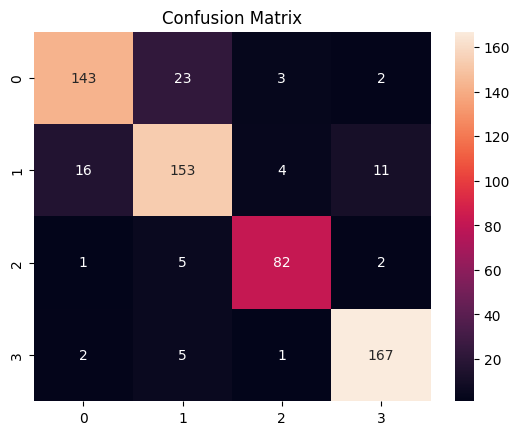

In [56]:
cm = confusion_matrix(y_true, y_predicted)

sns.heatmap(cm, annot=True,fmt=".0f")
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [57]:
print(classification_report(y_true,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       171
           1       0.82      0.83      0.83       184
           2       0.91      0.91      0.91        90
           3       0.92      0.95      0.94       175

    accuracy                           0.88       620
   macro avg       0.88      0.88      0.88       620
weighted avg       0.88      0.88      0.88       620



### Creating a new model with two more convolution layers and two more pooling layers

In [59]:
model1 = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=1024, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation='softmax'),
])

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

### Training our model

In [60]:
model1.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
62/62 [==============================] - 10s 109ms/step - loss: 1.3592 - accuracy: 0.2980 - val_loss: 1.3132 - val_accuracy: 0.3730
Epoch 2/50
62/62 [==============================] - 5s 81ms/step - loss: 1.1906 - accuracy: 0.4626 - val_loss: 1.1594 - val_accuracy: 0.4476
Epoch 3/50
62/62 [==============================] - 5s 81ms/step - loss: 1.0386 - accuracy: 0.5444 - val_loss: 0.9534 - val_accuracy: 0.5927
Epoch 4/50
62/62 [==============================] - 5s 81ms/step - loss: 0.8636 - accuracy: 0.6247 - val_loss: 0.7906 - val_accuracy: 0.6815
Epoch 5/50
62/62 [==============================] - 5s 82ms/step - loss: 0.7069 - accuracy: 0.7045 - val_loss: 0.7292 - val_accuracy: 0.6956
Epoch 6/50
62/62 [==============================] - 5s 81ms/step - loss: 0.5527 - accuracy: 0.7864 - val_loss: 0.5716 - val_accuracy: 0.7944
Epoch 7/50
62/62 [==============================] - 5s 81ms/step - loss: 0.4109 - accuracy: 0.8434 - val_loss: 0.5633 - val_accuracy: 0.7802
Epoch 8/50


### Prediction for X_test

In [61]:
y_pred = model1.predict(X_test)
y_predicted = np.argmax(y_pred, axis=1)

20/20 [==============================] - 1s 33ms/step


### Accuracy Score

In [62]:
accuracy_score(y_true,y_predicted)

0.864516129032258

### Confusion Matrix

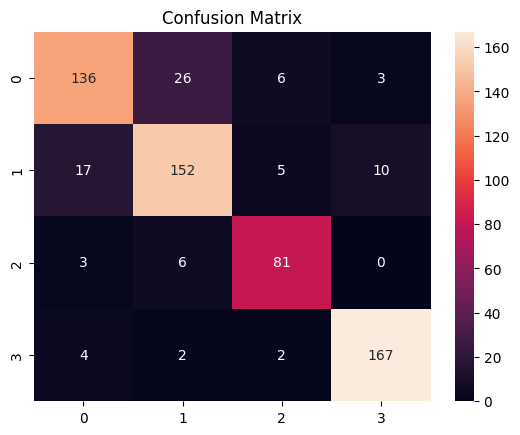

In [63]:
cm = confusion_matrix(y_true, y_predicted)

sns.heatmap(cm, annot=True,fmt=".0f")
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [64]:
print(classification_report(y_true,y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       171
           1       0.82      0.83      0.82       184
           2       0.86      0.90      0.88        90
           3       0.93      0.95      0.94       175

    accuracy                           0.86       620
   macro avg       0.86      0.87      0.87       620
weighted avg       0.86      0.86      0.86       620



### Using Pre-trained Model VGG16

In [65]:
from tensorflow.keras.applications.vgg16 import VGG16

In [70]:
vgg16 = VGG16(input_shape=(256,256,3), weights='imagenet', include_top=False)

for layer in vgg16.layers:
    layer.trainable = False
    
x = keras.layers.Flatten()(vgg16.output)

prediction = keras.layers.Dense(4, activation='softmax')(x)

model2 = keras.Model(inputs=vgg16.input, outputs=prediction)

In [71]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

### Training our model

In [72]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
62/62 [==============================] - 30s 377ms/step - loss: 1.0554 - accuracy: 0.6409 - val_loss: 0.5389 - val_accuracy: 0.7863
Epoch 2/50
62/62 [==============================] - 13s 214ms/step - loss: 0.3304 - accuracy: 0.8813 - val_loss: 0.3471 - val_accuracy: 0.8730
Epoch 3/50
62/62 [==============================] - 13s 208ms/step - loss: 0.2066 - accuracy: 0.9389 - val_loss: 0.3614 - val_accuracy: 0.8690
Epoch 4/50
62/62 [==============================] - 13s 206ms/step - loss: 0.1238 - accuracy: 0.9768 - val_loss: 0.2924 - val_accuracy: 0.8931
Epoch 5/50
62/62 [==============================] - 13s 206ms/step - loss: 0.0915 - accuracy: 0.9889 - val_loss: 0.2835 - val_accuracy: 0.8931
Epoch 6/50
62/62 [==============================] - 13s 208ms/step - loss: 0.0683 - accuracy: 0.9924 - val_loss: 0.2827 - val_accuracy: 0.9012
Epoch 7/50
62/62 [==============================] - 13s 209ms/step - loss: 0.0548 - accuracy: 0.9965 - val_loss: 0.2806 - val_accuracy: 0.8931

### Prediction for X_test

In [73]:
y_pred = model1.predict(X_test)
y_predicted = np.argmax(y_pred, axis=1)

20/20 [==============================] - 1s 27ms/step


### Accuracy Score

In [74]:
accuracy_score(y_true,y_predicted)

0.864516129032258

### Confusion Matrix

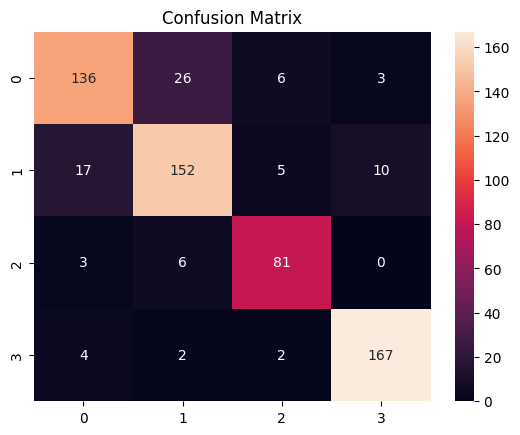

In [75]:
cm = confusion_matrix(y_true, y_predicted)

sns.heatmap(cm, annot=True,fmt=".0f")
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [76]:
print(classification_report(y_true,y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       171
           1       0.82      0.83      0.82       184
           2       0.86      0.90      0.88        90
           3       0.93      0.95      0.94       175

    accuracy                           0.86       620
   macro avg       0.86      0.87      0.87       620
weighted avg       0.86      0.86      0.86       620

